Aluno: Victor Souza

1. Acesse a página http://playground.tensorflow.org e utilizando apenas 2 entradas (x1 e x2), procure variar os
diversos parâmetros:
    - número de camadas
    - número de neurônios em cada camada
    - tipo de ativação
    - learning rate
    - fator de regularização
   
Resolva para o dataset "Spiral".

Coloque no notebook uma screenshot da tela com sua solução e comente sobre o que aprendeu nesse exercício (qual o impacto do número de camadas, neurônios em cada camada, ativação, learning rate e regularização).

In [1]:
#Importando a libs
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

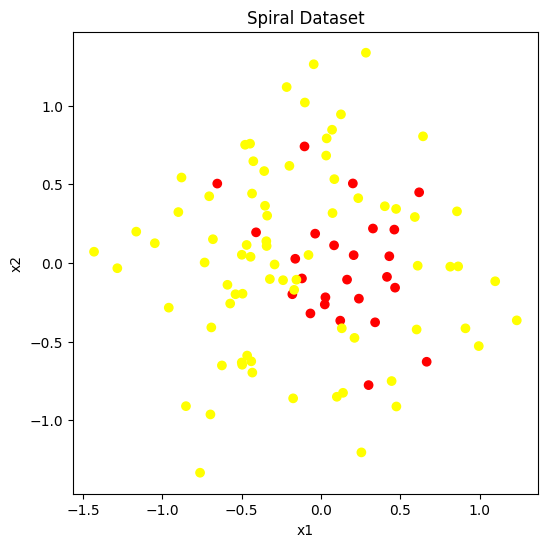

In [2]:
# Gerando o dataset "Spiral"
def generate_spiral_data(n_points=100, noise=0.3):
    theta = np.linspace(0, 4 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x1 = r * np.sin(theta) + np.random.randn(n_points) * noise
    x2 = r * np.cos(theta) + np.random.randn(n_points) * noise
    y = (theta > np.pi).astype(int)
    return np.vstack((x1, x2)).T, y

X, Y = generate_spiral_data()

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='autumn')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Spiral Dataset')
plt.show()


In [3]:
class SpiralModel(nn.Module):
    def __init__(self, num_layers=2, num_neurons=5, activation_func='ReLU'):
        super(SpiralModel, self).__init__()

        layers = []
        input_size = 2  # 2 entradas (x1, x2)

        # Definir camadas
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_neurons))
            if activation_func == 'ReLU':
                layers.append(nn.ReLU())
            elif activation_func == 'Sigmoid':
                layers.append(nn.Sigmoid())
            elif activation_func == 'Tanh':
                layers.append(nn.Tanh())
            input_size = num_neurons


        layers.append(nn.Linear(input_size, 2))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

model = SpiralModel(num_layers=3, num_neurons=10, activation_func='ReLU')
print(model)

SpiralModel(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=2, bias=True)
  )
)


In [4]:
X_tensor = torch.FloatTensor(X)
Y_tensor = torch.LongTensor(Y)


learning_rate = 0.1
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.01)  # Regularização L2
criterion = nn.CrossEntropyLoss()


def train(model, X_train, Y_train, num_epochs=1000):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, Y_train)

        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}")


train( model, Variable(X_tensor), Variable(Y_tensor), num_epochs=1000)

Epoch 100/1000, Loss: 0.556532084941864
Epoch 200/1000, Loss: 0.5485578775405884
Epoch 300/1000, Loss: 0.530665397644043
Epoch 400/1000, Loss: 0.5040974617004395
Epoch 500/1000, Loss: 0.48116084933280945
Epoch 600/1000, Loss: 0.4504806399345398
Epoch 700/1000, Loss: 0.3884904384613037
Epoch 800/1000, Loss: 0.34668755531311035
Epoch 900/1000, Loss: 0.33293232321739197
Epoch 1000/1000, Loss: 0.32817161083221436


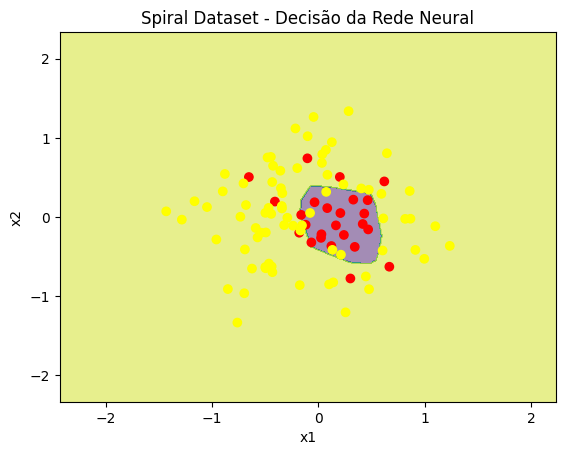

In [5]:
def plot_decision_boundary(model, X, Y, resolution=0.01):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = predict(model, torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='autumn')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Spiral Dataset - Decisão da Rede Neural')
    plt.show()

def predict(model, inputs):
    model.eval()
    outputs = model(Variable(inputs))
    _, predicted = torch.max(outputs, 1)
    return predicted.data.numpy()

plot_decision_boundary(model, X, Y)

##Aprendizados

Conclusões sobre o Impacto dos Parâmetros

Número de camadas: Aumentar o número de camadas pode ajudar a rede a aprender padrões mais complexos, mas também pode aumentar o risco de overfitting, especialmente com um número limitado de dados.

Número de neurônios por camada: Mais neurônios podem permitir que a rede capture mais informações, mas pode também tornar o treinamento mais difícil devido ao aumento na complexidade.

Tipo de ativação: A ativação ReLU é geralmente a mais eficiente, mas dependendo dos dados e da complexidade do problema, outras funções como Sigmoid ou Tanh podem ser mais adequadas.

Learning Rate: Um learning rate muito grande pode fazer com que a rede não converja corretamente, enquanto um learning rate muito pequeno pode levar a uma convergência muito lenta.

Regularização: A regularização ajuda a prevenir overfitting, especialmente quando o modelo tem muitas camadas ou neurônios.